# The `plotting` Package

This package uses several other python packages to make it easy to visualise our brains.

Let's start by importing a brain:

In [1]:
from maybrain import constants as ct
from maybrain import brain as mbt
a = mbt.Brain()
a.import_adj_file("data/mean_500.txt", delimiter=",")
a.import_spatial_info("data/parcel_500.txt")
a.apply_threshold()

## The `plotting.histograms` module

Maybrain makes it easy to plot some histograms by using the python package `Matplotlib`.

For example, with `plot_weight_distribution()` you can plot the distribution of the weights in the `Brain.G`'s edges.

(<matplotlib.figure.Figure at 0x7f4f40df5240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4f1f0a9320>)

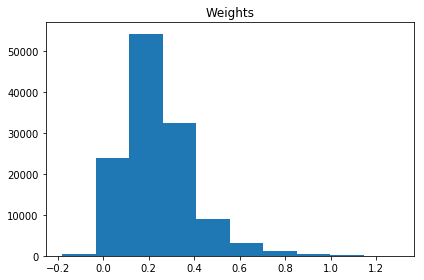

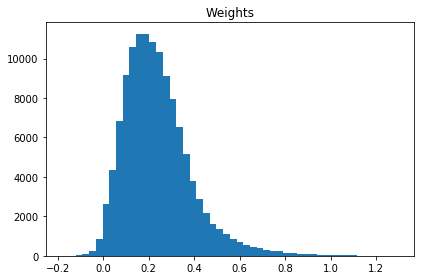

In [2]:
%matplotlib inline
from maybrain.plotting import histograms as hh

hh.plot_weight_distribution(a)
# You can define the number of bins, instead of using matplotlib automatic ones
hh.plot_weight_distribution(a, bins=50)